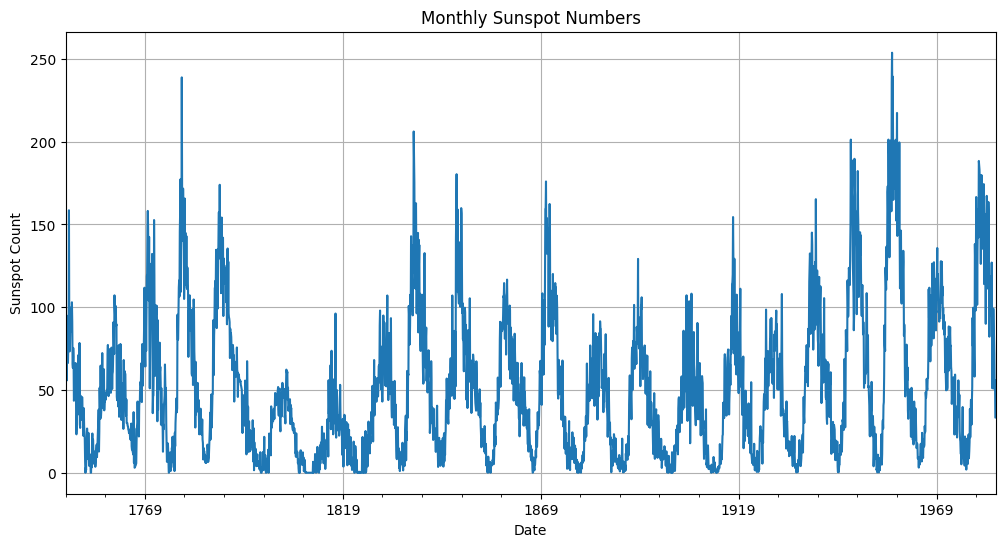

Original series:
ADF Statistic: -9.567667511913077
p-value: 2.3334521438662885e-16
Critical Values: {'1%': -3.432694313168895, '5%': -2.862575752726396, '10%': -2.5673213632123297}
Data is stationary

After first differencing:
ADF Statistic: -8.647590698681162
p-value: 5.21969068133879e-14
Critical Values: {'1%': -3.43269179459483, '5%': -2.8625746404198122, '10%': -2.567320771022878}
Data is stationary

After seasonal differencing (12 months):
ADF Statistic: -8.611026054085666
p-value: 6.475352948906665e-14
Critical Values: {'1%': -3.432702747682219, '5%': -2.862579477749862, '10%': -2.56732334640735}
Data is stationary


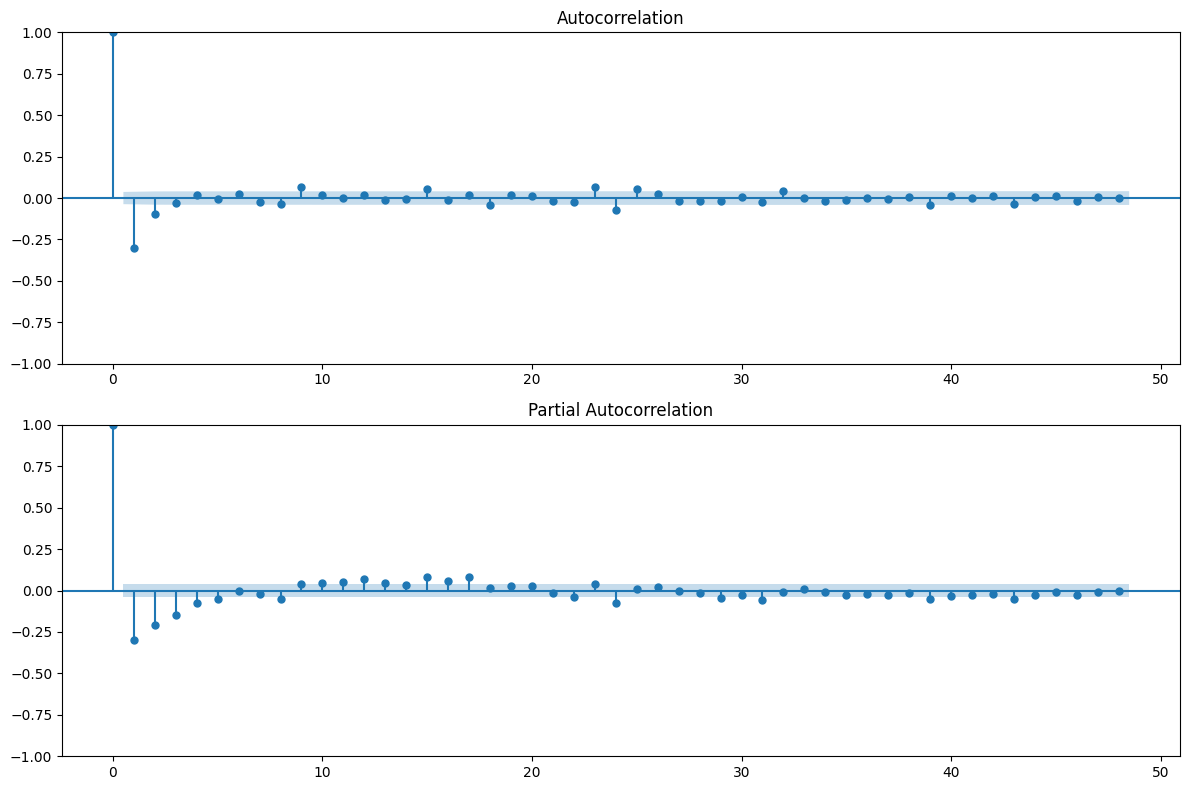

C:\Users\Sailesh\.conda\envs\Main\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sailesh\.conda\envs\Main\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                             Sunspots   No. Observations:                 2256
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -9204.743
Date:                              Tue, 06 May 2025   AIC                          18423.486
Time:                                      12:42:43   BIC                          18463.448
Sample:                                  01-01-1749   HQIC                         18438.079
                                       - 12-01-1936                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6806      0.074     -9.186      0.000      -0.826      -0.535
ar.L2          0.19

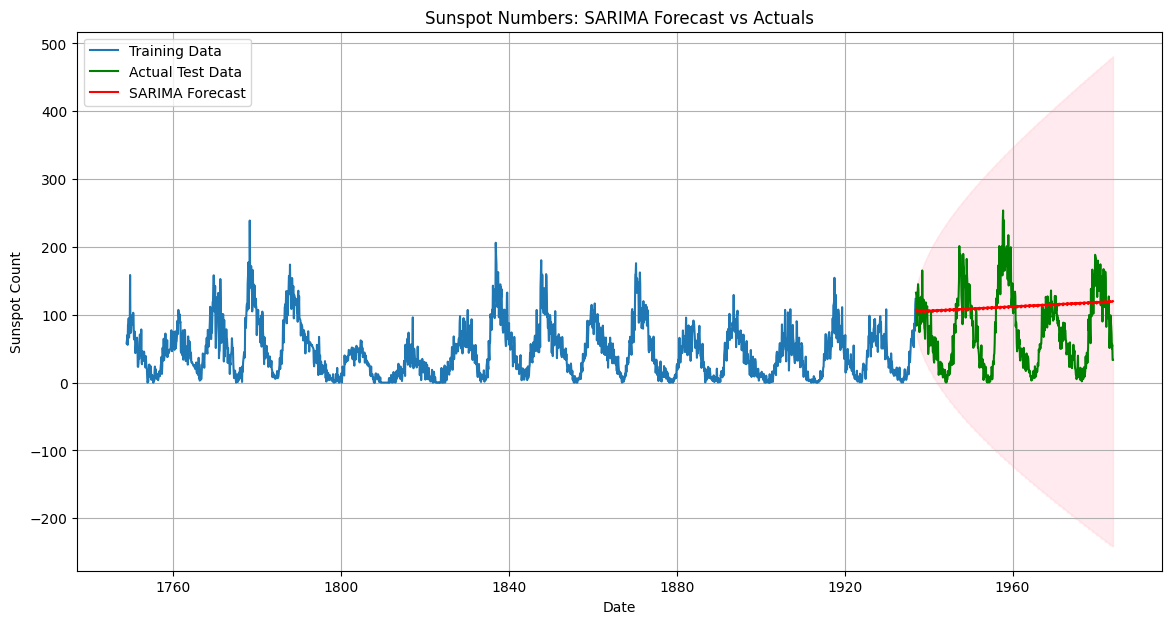

RMSE: 64.84


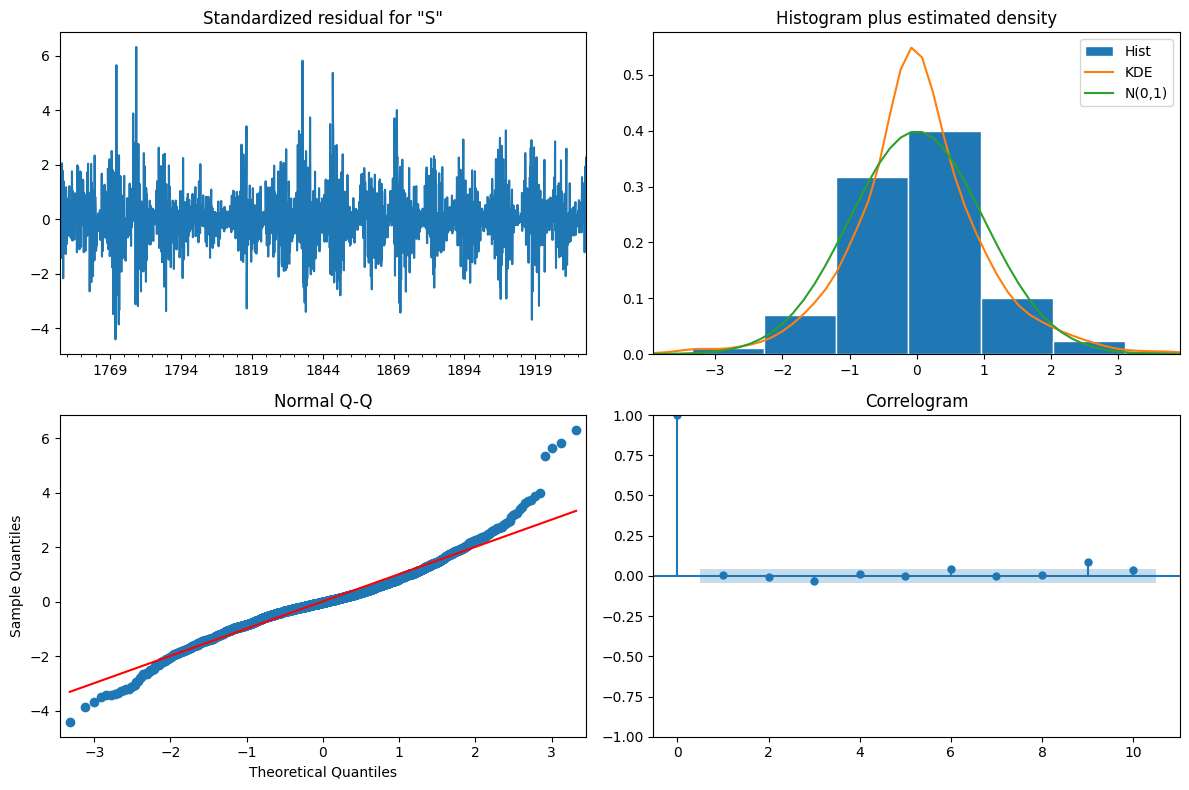

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

df.columns = ['Sunspots']

plt.figure(figsize=(12, 6))
df['Sunspots'].plot(title='Monthly Sunspot Numbers')
plt.xlabel('Date')
plt.ylabel('Sunspot Count')
plt.grid(True)
plt.show()

def check_stationarity(series):
    series_clean = series.dropna()
    result = adfuller(series_clean)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")

print("Original series:")
check_stationarity(df['Sunspots'])

df['sunspots_diff'] = df['Sunspots'].diff()
print("\nAfter first differencing:")
check_stationarity(df['sunspots_diff'])

df['sunspots_seasonal_diff'] = df['Sunspots'].diff(12)
print("\nAfter seasonal differencing (12 months):")
check_stationarity(df['sunspots_seasonal_diff'])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['sunspots_diff'].dropna(), lags=48, ax=ax1)
plot_pacf(df['sunspots_diff'].dropna(), lags=48, ax=ax2)
plt.tight_layout()
plt.show()

train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

order = (2, 1, 2)
seasonal_order = (1, 1, 1, 12)

model = SARIMAX(train['Sunspots'], 
                order=order, 
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)
print(results.summary())

forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Sunspots'], label='Training Data')
plt.plot(test.index, test['Sunspots'], label='Actual Test Data', color='green')
plt.plot(forecast_mean.index, forecast_mean, label='SARIMA Forecast', color='red')
plt.fill_between(conf_int.index,
                conf_int.iloc[:, 0],
                conf_int.iloc[:, 1], 
                color='pink', alpha=0.3)
plt.title('Sunspot Numbers: SARIMA Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Sunspot Count')
plt.legend()
plt.grid(True)
plt.show()

rmse = np.sqrt(mean_squared_error(test['Sunspots'], forecast_mean))
print(f'RMSE: {rmse:.2f}')

results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

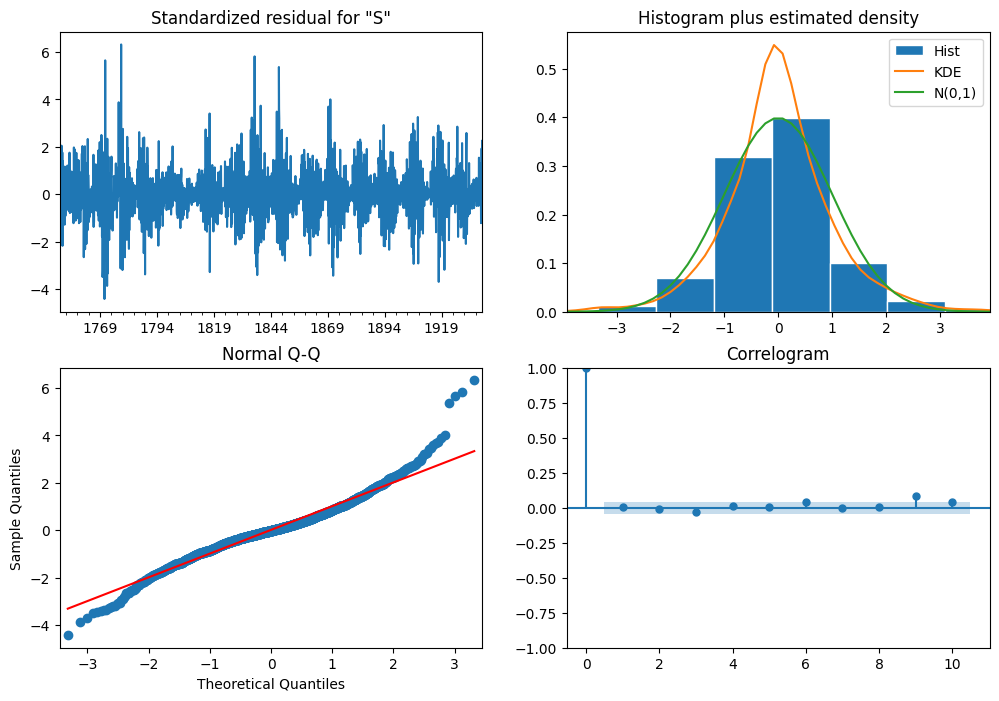

In [3]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()